# **KIDNEY DISEASE DATASET**
- binary classification problem - predicting chronic kidney disease
- data from 400 patients
- 24 features + 1 target column (0 = CKD absent, 1 = CKD present) + 1 id column

# **Variables description:**

- Age: The age of the patient.
- Blood Pressure: The blood pressure of the patient, in mm/Hg
- Specific Gravity: The specific gravity of urine, an indicator of kidney function.
- Albumin: The albumin level in urine, which can be an indicator of kidney damage.
- Sugar: The sugar level in urine.
- Red Blood Cells: The presence of red blood cells in urine, which can indicate kidney problems.
- Pus Cells: The presence of pus cells (white blood cells) in urine.
- Pus Cell Clumps: The presence of clumps of pus cells in urine.
- Bacteria: The presence of bacteria in urine.
- Blood Glucose Random: Random blood glucose levels, in mgs/dl
- Blood Urea: Blood urea levels, an indicator of kidney and liver function, in mgs/dl
- Serum Creatinine: Serum creatinine levels, an indicator of kidney function, in mgs/dl
- Sodium: Sodium levels in blood, in mEq/L
- Potassium: Potassium levels in blood, in mEq/L
- Hemoglobin: Hemoglobin levels in blood, in gms
- Packed Cell Volume: The volume percentage of red blood cells in blood.
- White Blood Cell Count: The count of white blood cells in blood, in cells/cumm
- Red Blood Cell Count: The count of red blood cells in blood, in millions/cumm
- Hypertension: Whether the patient has hypertension (yes/no).
- Diabetes: Whether the patient has diabetes (yes/no).
- Coronary Artery Disease: Whether the patient has coronary artery disease (yes/no).
- Appetite: The patient's appetite level (poor/good).
- Pedal Edema: The presence of pedal edema (swelling of feet and ankles).
- Anemia: Whether the patient has anemia (yes/no).
- Class: The target variable indicating whether the patient has chronic kidney disease (ckd) or not (notckd).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# IMPORT DATASET

ckd = pd.read_csv("kidney_disease.csv")

In [ ]:
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
ckd.shape

(400, 26)

In [ ]:
ckd.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
ckd.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
# check for missing data

ckd.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: >

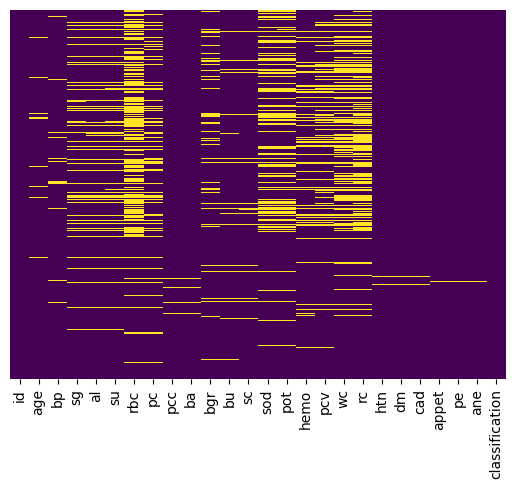

In [ ]:
# Visualize how much data is missing

sns.heatmap(ckd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<ipython-input-9-5f35b89f67fe>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ckd.corr(), annot= True)


<Axes: >

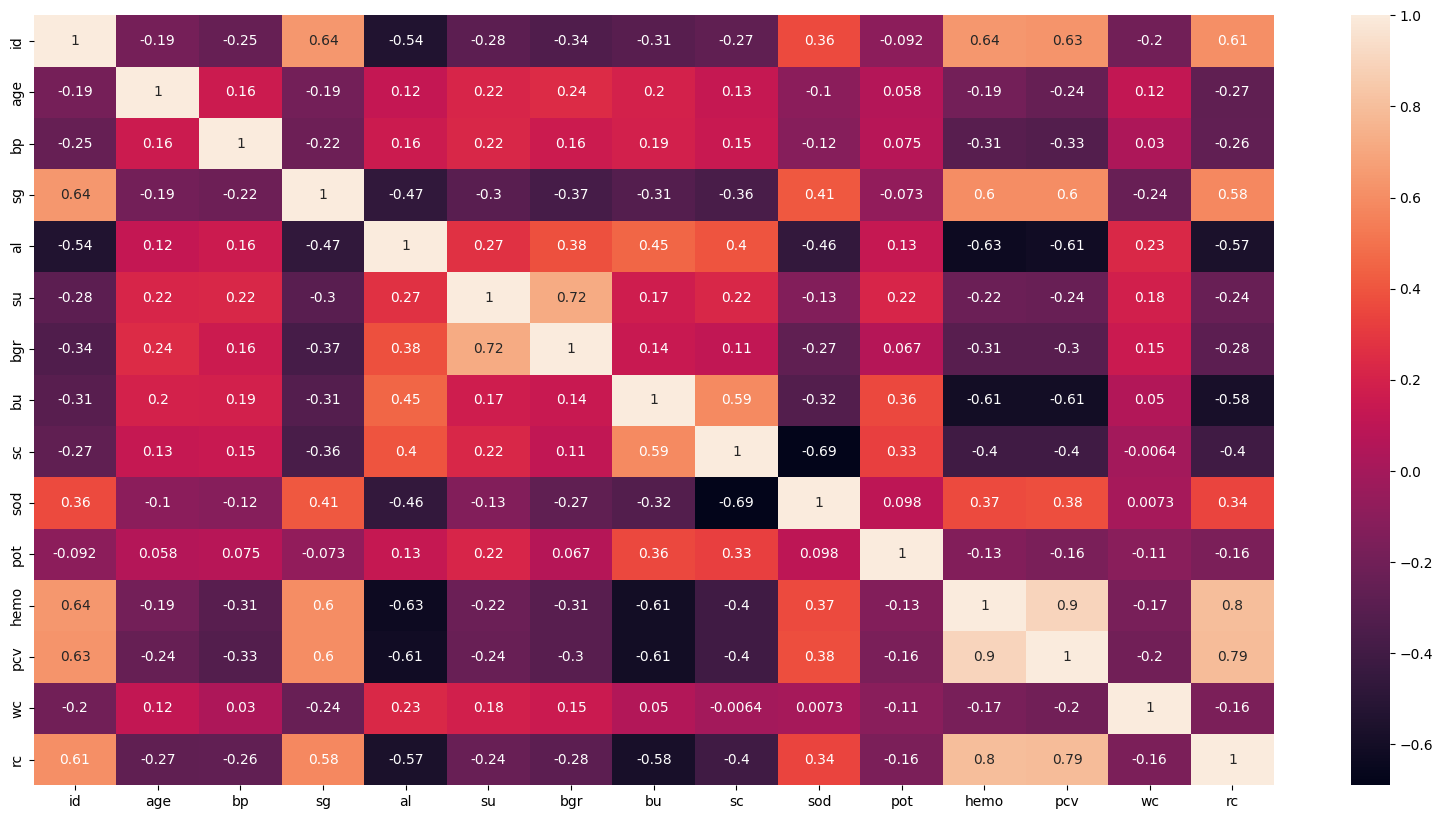

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(ckd.corr(), annot= True)

In [ ]:
# replacing nan in continuous columns with their respective medians

# List of columns with NaN values to replace
columns_with_nans = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc','sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Calculate the median for each column and fill NaN values with the mean
for column in columns_with_nans:
    median_value = ckd[column].median()
    ckd[column].fillna(median_value, inplace=True)


In [ ]:
# replacing nan with 'unknown' in rbc and pc columns

ckd['rbc'].fillna('unknown', inplace=True)

ckd['pc'].fillna('unknown', inplace=True)

In [ ]:
# replacing nan in rest of the categorical columns with mode

# List of columns with NaN values to replace
columns_with_nans = ['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Calculate the mode for each column and fill NaN values with the mode
for column in columns_with_nans:
    mode_value = ckd[column].mode()[0]  # Using [0] to get the first mode if multiple modes exist
    ckd[column].fillna(mode_value, inplace=True)


In [ ]:
# classification column has issues - fixing

ckd['classification'] = np.where(ckd['classification'] == 'notckd', 'notckd', 'ckd')

In [ ]:
ckd.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

**Model- running simple random forest classification**

In [ ]:
# dummy creation

df = pd.get_dummies(ckd, columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], drop_first=True)

df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pc_unknown,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,1,0,0,0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,1,0,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,1,0,0,0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,0,1,0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# convert target column to 1/0

df['classification'] = np.where(df['classification'] == 'ckd', 1, 0)

df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pc_unknown,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,1,0,0,0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,1,0,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,1,0,0,0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,0,1,0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X= df.drop(['classification', 'id'], axis= 1)

In [ ]:
X.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pc_unknown,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# making classfication the y var (output)

y= df['classification']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [ ]:
# splitting into train and test-70/30

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=10)

In [ ]:
X_train.shape

(280, 26)

In [ ]:
X_test.shape

(120, 26)

In [ ]:
y_train.shape

(280,)

In [ ]:
y_test.shape

(120,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# set seed

np.random.seed(123)

In [ ]:
# fit train data to random forest model

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# now apply predict function to predict for X_test

predictions = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(y_test, predictions)

In [ ]:
accuracy

array([[37,  0],
       [ 0, 83]])

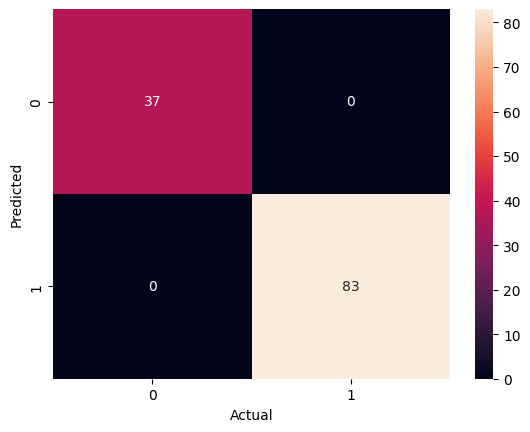

In [ ]:
# generate confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(accuracy, annot= True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)

In [ ]:
accuracy

# model accuracy is 100% on test

1.0

### **SHAP**

In [ ]:
!pip install shap

import shap
import random

# set seed

random.seed(123)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# Fits the explainer

explainer = shap.Explainer(rf.predict, X_test)

shap_values = explainer(X_test)

Permutation explainer: 121it [00:35,  2.35it/s]


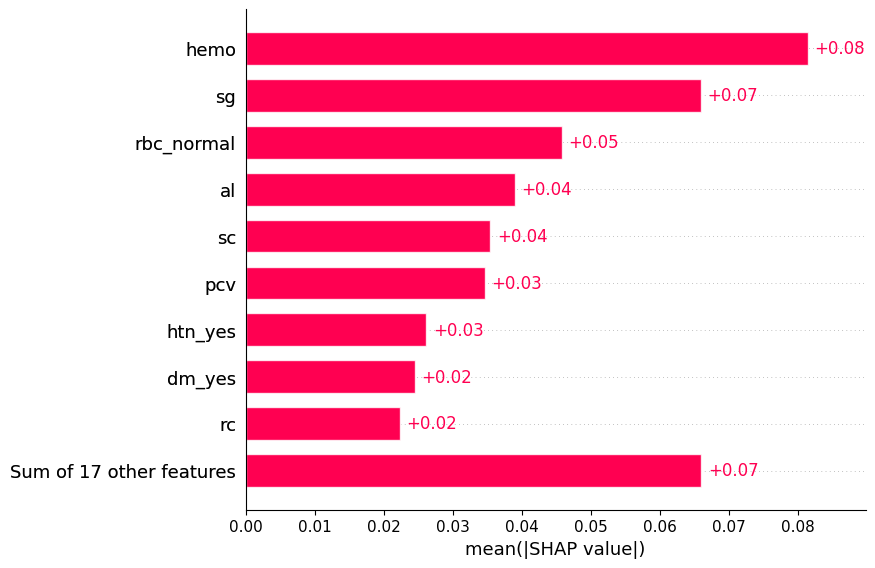

In [ ]:
# Global effect of features on prediction

shap.plots.bar(shap_values, max_display = 10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


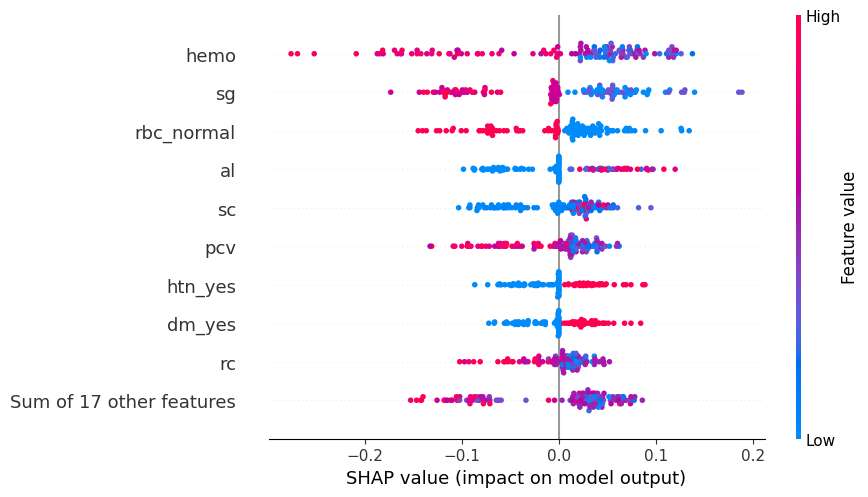

In [ ]:
# BEESWARM PLOT

shap.plots.beeswarm(shap_values)